# Proyek Analisis Data: PRSA_Data_Tiantan_20130301-20170228
- **Nama:** Ummu Athiya
- **Email:** ummuathiyyah05@gmail.com
- **ID Dicoding:** ummu_athiya

## Menentukan Pertanyaan Bisnis

- Pada bulan apa rata-rata konsentrasi PM2.5 dalam udara mencapai nilai tertingginya di tahun 2016?
- Di jam berapakah rata-rata jumlah PM2.5 di udara tinggi?
- Faktor apa saja yang mempengaruhi atau berkorelasi kuat dengan konsentrasi PM2.5?

## Import Semua Packages/Library yang Digunakan

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [46]:
prsa_tiantan_df = pd.read_csv("./data/PRSA_Data_Tiantan_20130301-20170228.csv")
prsa_tiantan_df.head(15)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan
5,6,2013,3,1,5,10.0,10.0,12.0,15.0,400.0,70.0,-2.4,1027.5,-21.3,0.0,NW,2.4,Tiantan
6,7,2013,3,1,6,8.0,19.0,12.0,14.0,400.0,72.0,-2.5,1028.2,-20.4,0.0,NW,2.2,Tiantan
7,8,2013,3,1,7,7.0,7.0,12.0,19.0,400.0,67.0,-1.4,1029.5,-20.4,0.0,NNW,3.0,Tiantan
8,9,2013,3,1,8,3.0,6.0,14.0,29.0,500.0,56.0,-0.3,1030.4,-21.2,0.0,NW,4.6,Tiantan
9,10,2013,3,1,9,8.0,2.0,11.0,22.0,500.0,65.0,0.4,1030.5,-23.3,0.0,N,5.5,Tiantan


**Insight:**
- Kualitas udara mengalami peningkatan polusi setelah jam 4 pagi ditandai dengan angka PM2.5 dan PM10 yang naik cukup signifikan dari 5.0 ke 10.0
- Tekanan tinggi dan suhu rendah menunjukkan kondisi cuaca musim dingin di bulan Maret 2013

### Assessing Data

In [47]:
prsa_tiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [48]:
prsa_tiantan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [49]:
print("Jumlah duplikasi: ", prsa_tiantan_df.duplicated().sum())

Jumlah duplikasi:  0


In [50]:
prsa_tiantan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


**Insight:**
- Beberapa kolom memiliki jumlah missing values yang cukup besar
- Tidak ada duplikasi data pada dataset

### Cleaning Data

In [51]:
#Untuk kolom PM2.5, PM10, SO2, NO2, CO, dan O3 karena data polutan cenderung berkesinambungan, maka saya menggunakan teknik interpolasi

prsa_tiantan_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']] = prsa_tiantan_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear')

In [52]:
#Sama seperti kolom polutan, kolom cuaca (TEMP, PRES, DEWP, RAIN) juga berkesinambungan, jadi saya menggunakan teknik interpolasi linier

prsa_tiantan_df[['TEMP', 'PRES', 'DEWP', 'RAIN']] = prsa_tiantan_df[['TEMP', 'PRES', 'DEWP', 'RAIN']].interpolate(method='linear')

In [53]:
#Untuk kolom wd menggunakan teknik imputasi dengan Mode (yang paling sering muncul)

prsa_tiantan_df['wd'] = prsa_tiantan_df['wd'].fillna(prsa_tiantan_df['wd'].mode()[0])

In [54]:
#Menggunakan interpolasi linier karena kecepatan angin biasanya berubah secara kontinu

prsa_tiantan_df['WSPM'] = prsa_tiantan_df['WSPM'].interpolate(method='linear')

In [55]:
prsa_tiantan_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [56]:
prsa_tiantan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.033097,106.537076,14.510018,53.258828,1305.333262,56.148077,13.668250,1012.551871,2.445126,0.063983,1.860815
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.895489,90.277762,20.277493,32.016282,1179.450046,59.458361,11.459735,10.266471,13.811939,0.786059,1.280427
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,518.125000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [58]:
prsa_tiantan_df.to_csv("all_data.csv", index=False)

**Insight:**
- Missing value pada beberapa kolom sudah diisi dengan menggunakan teknik interpolasi linier dan juga imputasi dengan Mode
- Untuk beberapa kolom mungkin terjadi perubahan yang tidak signifikan pada mean karena data Missing Value sudah terisi

## Exploratory Data Analysis (EDA)

### Explore prsa_tiantan_df

In [59]:
prsa_tiantan_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
4372,4373,2013,8,30,4,4.0,6.0,1.0,17.0,300.0,45.0,19.3,1008.0,10.0,0.0,N,1.2,Tiantan
12063,12064,2014,7,16,15,180.0,180.0,9.0,52.0,1400.0,164.0,30.5,997.4,22.4,0.0,ESE,2.9,Tiantan
19136,19137,2015,5,7,8,35.0,106.0,5.0,53.0,600.0,58.0,15.4,1008.0,2.2,0.0,SW,1.7,Tiantan
30617,30618,2016,8,27,17,12.0,139.0,2.0,24.0,200.0,90.0,25.9,1006.2,10.1,0.9,WSW,3.6,Tiantan
5547,5548,2013,10,18,3,201.0,174.0,3.0,60.0,1900.0,1.0,6.2,1021.4,5.3,0.0,NE,1.1,Tiantan


In [60]:
# melihat rata-rata PM2.5, PM10, CO, dan TEMP perbulannya dari tahun 2013 s.d 2017

prsa_tiantan_df.groupby(by=["year", "month"]).agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "CO": "mean",
    "TEMP": "mean"
})

PM2.5        PM10           CO       TEMP
year month                                                
2013 3      105.959005  123.262097  1564.612231   6.256989
     4       60.973611   90.941667   983.456250  12.632361
     5       80.413306  138.120968  1116.173387  21.929301
     6      110.459028  133.757639  1445.607639  23.823611
     7       69.298387   84.125000  1062.881720  27.485215
     8       64.237903   82.295027   922.043011  27.321102
     9       80.156944  105.964583  1326.654167  20.456528
     10      95.063172  118.759409  1284.811828  13.111559
     11      80.386111  103.433333  1533.680556   6.262222
     12      85.126344  102.494624  1877.956989   0.335753
2014 1       99.918683  125.866935  1985.618280  -0.205914
     2      144.423363  148.400298  2208.854167  -0.416220
     3       94.177419  127.750000  1440.456989   9.859140
     4       85.298611  126.701389   942.152778  17.042500
     5       63.524866  114.754570   899.327957  21.778495
     6       60.356944   82.452083   912.986111  24.703750
     7       91.887769  115.534946  1012.768817  28.170833
     8       65.877151   82.845296   923.723118  26.047043
     9       68.297222   85.309722  1084.791667  20.814028
     10     114.526210  137.167339  1423.387097  13.442070
     11      88.861111  126.480694  1601.527778   5.528333
     12      67.298656  107.408401  1685.483871  -1.168548
2015 1      101.555511  115.311156  1873.723118  -1.221505
     2       96.311756  121.285714  1436.607143   1.198512
     3       87.609409  136.759812  1159.610215   8.439862
     4       73.302083  110.490694   780.069444  15.630139
     5       53.603495   94.027554   734.206989  21.455511
     6       62.145833   79.858611  1268.958333  24.537778
     7       63.801075   75.700269   936.357527  26.397849
     8       47.372312   60.741935   871.706989  26.435753
     9       49.304167   61.922917   888.888889  20.600833
     10      71.948253   88.940860   974.731183  14.319758
     11     121.156944  125.953472  1875.347222   2.847778
     12     157.461694  164.081989  2828.494624  -0.362769
2016 1       71.588038   87.300403  1591.532258  -4.550000
     2       44.742098   60.992098   925.215517   1.398420
     3       90.492608  124.986559  1225.336022   9.201882
     4       65.812500  112.107639   847.916667  16.454722
     5       48.961022   88.128360   702.284946  21.672849
     6       62.451389   81.204167   786.805556  25.735833
     7       71.191532   76.568548   964.247312  27.699462
     8       48.283602   58.771505   881.048387  27.863306
     9       56.415278   68.768056   836.875000  22.219115
     10      80.396505   97.039651  1214.314516  13.338648
     11      99.845833  130.695833  1791.388889   4.414028
     12     143.213710  178.470430  2552.688172   0.640726
2017 1      121.524194  153.096102  2276.814516  -1.138740
     2       71.781250   95.707589  1192.782738   2.661533

In [61]:
# melihat rata-rata PM2.5 dan PM10, perjamnya

prsa_tiantan_df.groupby(by=["hour"]).agg({
    "PM2.5": "mean",
    "PM10": "mean",
})

,PM2.5,PM10
hour,,
0,88.932751,115.352886
1,88.699150,113.389174
2,88.273421,109.726900
3,86.929250,105.889507
4,84.576660,101.654396
5,81.597090,97.131777
6,79.255803,96.334484
7,77.564643,96.959504
8,78.497130,101.708367


**Insight:**
- Jika dilihat berdasarkan nilai rata-ratanya, korelasi antara PM2.5 dan PM10 kemungkinan cukup erat karena ketika PM2.5 naik angka PM10 juga cenderung ikut naik, vice versa. 
- Berdasarkan rata-rata per-jam nya, angka PM2.5 cenderung tinggi di jam-jam midnight atau tengah malam

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada bulan apa rata-rata konsentrasi PM2.5 dalam udara mencapai nilai tertingginya di tahun 2016?

C:\Users\ummua\AppData\Local\Temp\ipykernel_28644\3432255673.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_data_2016.month = monthly_data_2016.month.map(map_dict)


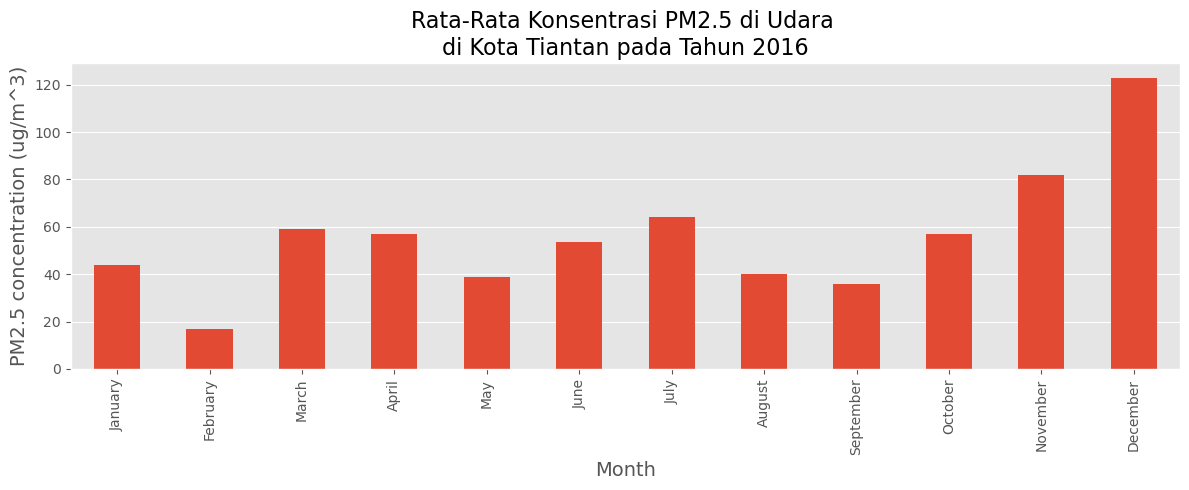

In [62]:
#mengambil data hanya di tahun 2016
prsa_tiantan_df['year'] = prsa_tiantan_df['year'].astype(int)
data_2016 = prsa_tiantan_df[prsa_tiantan_df['year'] == 2016]


monthly_data_2016 = data_2016[['month', 'PM2.5']]

months = ['January','February','March','April','May','June','July',
         'August','September','October','November','December']

ordered_monthdf = pd.DataFrame(months,columns=['month'])

map_dict = {}
for i,j in enumerate(months):
    map_dict.setdefault(i+1,j)

monthly_data_2016.month = monthly_data_2016.month.map(map_dict)

monthly_average = monthly_data_2016.groupby('month').median()
monthly_average = pd.merge(ordered_monthdf,monthly_average,left_on='month',right_index=True)
monthly_average = np.round(monthly_average,1)
monthly_average = monthly_average.set_index('month')

# mem-plot data
with plt.style.context('ggplot'):
    monthly_average.plot(figsize=(12,5),legend=False,kind='bar',linewidth=.9)
    plt.xlabel('Month',fontsize=14)
    plt.ylabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Rata-Rata Konsentrasi PM2.5 di Udara \ndi Kota Tiantan pada Tahun 2016',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

### Pertanyaan 2: Di jam berapakah rata-rata jumlah PM2.5 di udara tinggi?

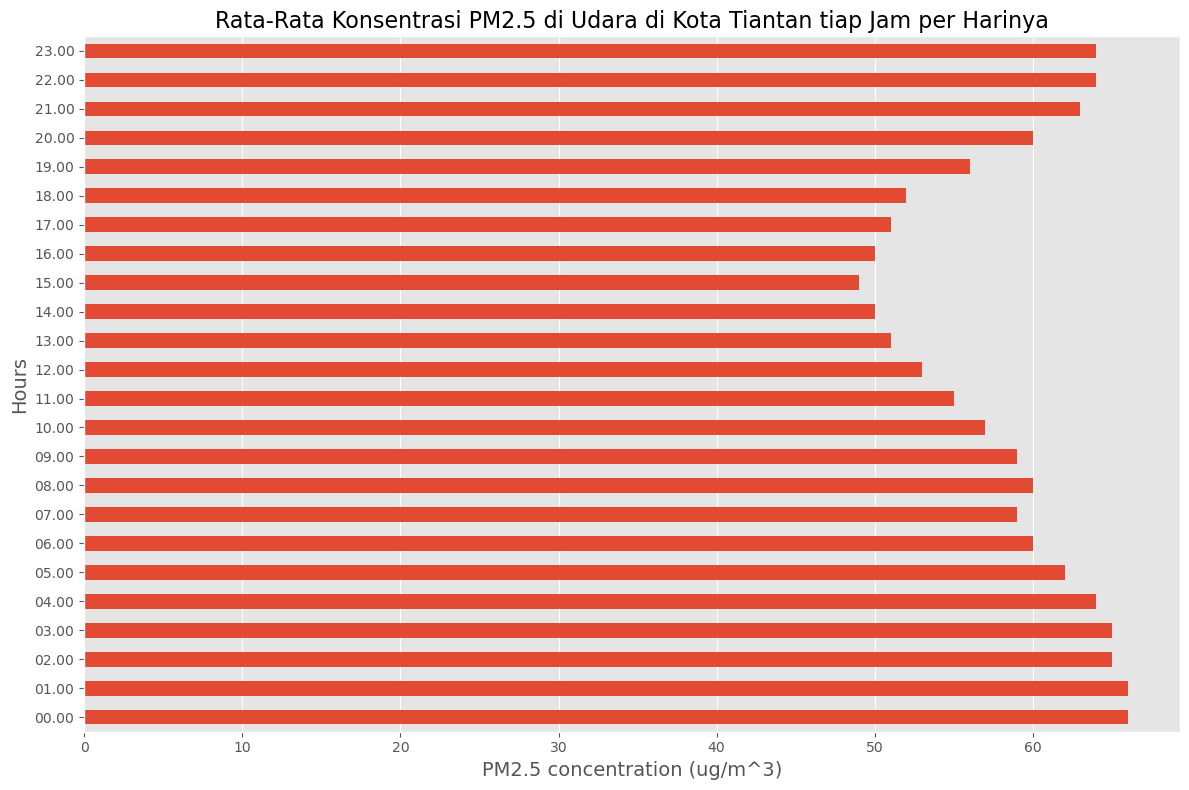

In [63]:
hourly_data = prsa_tiantan_df[['hour','PM2.5']]

hrs = ['00.00','01.00','02.00','03.00','04.00','05.00','06.00','07.00','08.00','09.00','10.00',
       '11.00','12.00','13.00','14.00','15.00','16.00','17.00','18.00','19.00',
       '20.00','21.00','22.00','23.00']

hour_dict = {}
for i,j in enumerate(hrs):
    hour_dict.setdefault(i,j)
    
hourly_data = hourly_data.groupby('hour').median().reset_index()
hourly_data.hour = hourly_data.hour.map(hour_dict)
hourly_data = hourly_data.set_index('hour')

# mem-plot data
with plt.style.context('ggplot'):
    hourly_data.plot(figsize=(12,8),legend=False,kind='barh',linewidth=.9)
    plt.ylabel('Hours',fontsize=14)
    plt.xlabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Rata-Rata Konsentrasi PM2.5 di Udara di Kota Tiantan tiap Jam per Harinya',fontsize=16)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

### Pertanyaan 3: Faktor apa saja yang mempengaruhi atau berkorelasi kuat dengan konsentrasi PM2.5?

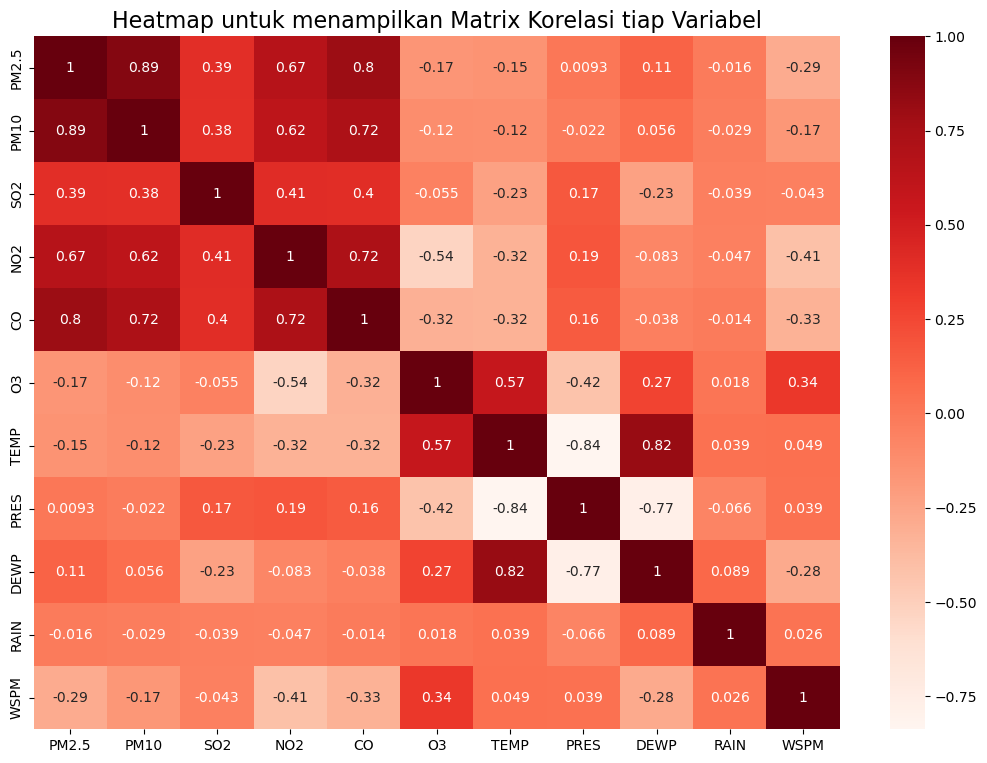

In [64]:
plt.figure(figsize=(13,9))

correlation_data = prsa_tiantan_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']]

sns.heatmap(correlation_data.corr(),cmap=plt.cm.Reds,annot=True)

plt.title('Heatmap untuk menampilkan Matrix Korelasi tiap Variabel',fontsize=16)
plt.show()

**Insight:**
- Bar Chart pertama menunjukkan rata-rata konsentrasi PM2.5 di udara di Kota Tiantan dari bulan Januari s.d Desember tahun 2016.
- Bar Chart kedua menunjukkan rata-rata konsentrasi PM2.5 di udara di Kota Tiantan tiap jam dalam satu hari.
- Heatmap menunjukkan korelasi antar variabel-variabel yang ada pada data.

## Analisis Lanjutan (Opsional)

In [65]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [66]:
import geopandas as gpd
from shapely.geometry import Point

#Menambahkan kolom 'latitude' dan 'longitude' kota Tiantan pada dataset
data_2016 = prsa_tiantan_df[prsa_tiantan_df['year'] == 2016].copy()
data_2016['latitude'] = 39.888 
data_2016['longitude'] = 116.397 

# Mengubah DataFrame menjadi GeoDataFrame
geometry = [Point(xy) for xy in zip(data_2016['longitude'], data_2016['latitude'])]
geo_df = gpd.GeoDataFrame(data_2016, geometry=geometry)

geo_df.head()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,latitude,longitude,geometry
24864,24865,2016,1,1,0,193.0,209.0,7.0,101.0,3800.0,...,-2.5,1024.5,-8.2,0.0,NNE,1.1,Tiantan,39.888,116.397,POINT (116.397 39.888)
24865,24866,2016,1,1,1,183.0,187.0,5.0,96.0,3500.0,...,-3.5,1023.8,-7.3,0.0,NE,1.0,Tiantan,39.888,116.397,POINT (116.397 39.888)
24866,24867,2016,1,1,2,178.0,191.0,5.0,95.0,3700.0,...,-4.7,1023.7,-7.3,0.0,ENE,0.8,Tiantan,39.888,116.397,POINT (116.397 39.888)
24867,24868,2016,1,1,3,195.0,206.0,7.0,99.0,4100.0,...,-3.6,1023.1,-7.7,0.0,ENE,1.5,Tiantan,39.888,116.397,POINT (116.397 39.888)
24868,24869,2016,1,1,4,179.0,182.0,8.0,97.0,3800.0,...,-5.1,1022.3,-7.7,0.0,E,1.0,Tiantan,39.888,116.397,POINT (116.397 39.888)


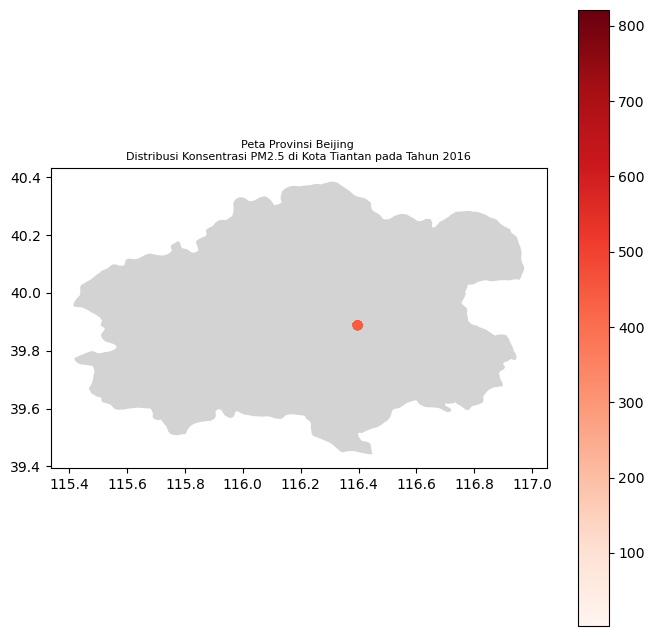

In [67]:
#Peta Provinsi Beijing (tidak ketemu yang Tiantan)
city_map = gpd.read_file('./data/hg548kt7784.shp')

fig, ax = plt.subplots(figsize=(8, 8))
city_map.plot(ax=ax, color='lightgray')

# Plot data PM2.5
geo_df.plot(column='PM2.5', ax=ax, legend=True, cmap='Reds')

plt.title('Peta Provinsi Beijing \nDistribusi Konsentrasi PM2.5 di Kota Tiantan pada Tahun 2016', fontsize=8)
plt.show()

## Conclusion

- Conclution pertanyaan 1: Angka PM2.5 di udara di Kota Tiantan mencapai nilai tertinggi pada bulan Desember di tahun 2016, dengan rata-rata perbulannya mencapai 143.2 ug/m^3.
- Conclution pertanyaan 2: Jumlah PM2.5 di udara di Kota Tiantan tinggi di jam-jam malam, dimulai dari jam 22.00 malam s.d jam 02.00 dini hari dengan rata-rata berada di kisaran 88 ug/m^3.
- Conclution pertanyaan 3: Berdasarkan heatmap, PM2.5 dan PM10 memiliki korelasi tertinggi yaitu 0.89, lalu PM2.5 dan CO dengan angka 0.8.